# [**Test par permutations de la signifiance d'un score de classification**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/3_model_selection/plot_permutation_tests_for_classification.ipynb)<br/>([_Test with permutations the significance of a classification score_](https://scikit-learn.org/stable/auto_examples/model_selection/plot_permutation_tests_for_classification.html))

Cet exemple démontre l'utilisation de [**`permutation_test_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html) pour évaluer la signifiance d'un score validé en utilisant des permutations.

In [ ]:
# Authors:  Alexandre Gramfort <alexandre.gramfort@inria.fr>
#           Lucy Liu
# License: BSD 3 clause

# Jeu de données

Nous utiliserons le [**jeu de données des plantes Iris** (7.1.1)](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), qui est composé de mesures prises sur 3 types d'iris.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Nous générerons également des données de caractéristiques aléatoires (c'est-à-dire, 20 caractéristiques), sans corrélation avec les étiquettes de classe du jeu de données Iris.

In [2]:
import numpy as np

n_uncorrelated_features = 20
rng = np.random.RandomState(seed=0)
# Use same number of samples as in iris and 20 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

# Test avec permutations de la signifiance

Ensuite, nous calculons le [**`permutation_test_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html) en utilisant le jeu de données Iris original, qui prédit fortement les étiquettes, ainsi que les caractéristiques générées aléatoirement et les étiquettes d'iris, qui ne devraient avoir aucune dépendance entre les caractéristiques et les étiquettes. Nous utilisons le classifieur [**`SVC`**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) et le [**Score d'exactitude** (3.3.2.2)](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) pour évaluer le modèle à chaque itération.

[**`permutation_test_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html) génère une distribution nulle en calculant l'exactitude du classifieur sur 1000 permutations différentes du jeu de données, où les caractéristiques restent les mêmes mais les étiquettes subissent différentes permutations. Ceci est la distribution pour l'hypothèse nulle, qui affirme qu'il n'y a aucune dépendance entre les caractéristiques et les étiquettes. Une valeur p empirique est ensuite calculée comme pourcentage de permutations pour lesquelles le score obtenu est supérieur au score obtenu en utilisant les données originales.

In [3]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from sklearn.svm import SVC

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    clf, X_rand, y, scoring="accuracy", cv=cv, n_permutations=1000
)

## Données d'origine

Ci-dessous, nous représentons un histogramme des scores de permutation (la distribution nulle). La ligne rouge indique le score obtenu par le classifieur sur les données d'origine. Le score est bien meilleur que ceux obtenus en utilisant des données permutées et la valeur p est donc très faible. Cela indique qu'il y a peu de chances que ce bon score soit obtenu par pur hasard. Cela fournit des preuves que le jeu de données Iris contient une véritable dépendance entre les caractéristiques et les étiquettes, et que le classifieur a pu l'utiliser pour obtenir de bons résultats.

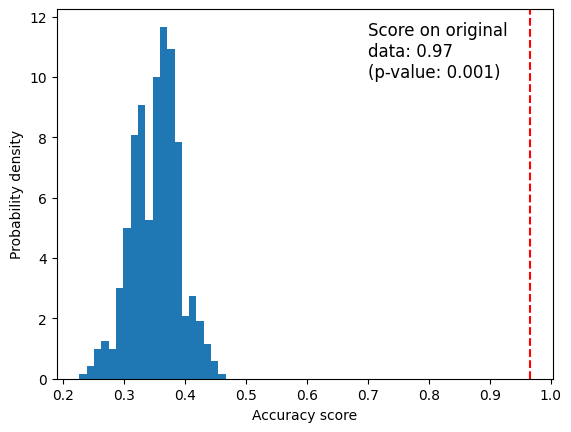

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

## Données aléatoires

Ci-dessous, nous représentons la distribution nulle pour les données aléatoires. Les scores de permutation sont similaires à ceux obtenus à l'aide du jeu de données Iris original car la permutation détruit toujours toute dépendance caractéristiques-étiquettes présente. Cependant, le score obtenu sur les données aléatoires d'origine est dans ce cas très faible. Cela entraîne une grande valeur p, confirmant qu'il n'y avait aucune dépendance caractéristiques-étiquettes dans les données d'origine.

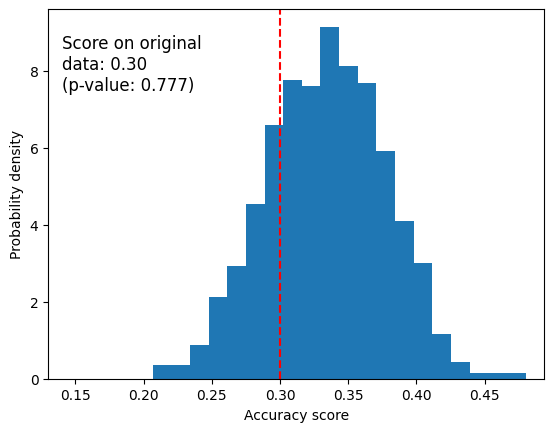

In [5]:
fig, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
ax.set_xlim(0.13)
ax.axvline(score_rand, ls="--", color="r")
score_label = f"Score on original\ndata: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.14, 7.5, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability density")
plt.show()

Une autre raison possible d'obtenir une valeur p élevée est que le classifieur n'ait pas été en mesure d'exploiter la structure des données. Dans ce cas, la valeur p sera faible uniquement pour les classifieurs capables d'utiliser la dépendance présente. Dans notre cas ci-dessus, où les données sont aléatoires, tous les classifieurs auraient une valeur p élevée car aucune structure n'est présente dans les données.

Enfin, notez que ce test a montré qu'il produit des valeurs p faibles même s'il n'y a qu'une faible structure dans les données [1].

## Références

[1] 🔬 Ojala and Garriga. [**“Permutation Tests for Studying Classifier Performance”**](https://www.jmlr.org/papers/volume11/ojala10a/ojala10a.pdf). The Journal of Machine Learning Research (2010) vol. 11